# EPBP ANALYTICS

# Havaianas

### Este arquivo contém informações de uma base de dados da Havaianas, foram realizados tratamento e limpeza dos dados, além de análises exploratórias e métricas solicitadas pelo cilente.

### Algumas dessas métricas: Total de produtos, Prazo médio de entrgas, Faturamento Bruto e Líquido, Faturamento por Loja/Filial, Curva ABC por produto, entre outros...

#### Abaixo todos os processos realizados.

#### Primeiro passo, importar algumas bibliotecas que serão utilizadas e logo em seguida ler o arquivo.

In [1]:
# Importando Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
data = pd.read_excel('tb_estoque.xlsx') # Comando para ler um arquivo em excel e armazenar na variável "data"

In [3]:
data.head() # Lendo as primeiras 5 linhas do DataFrame

,DATA ENTRADA,DATA ULTIMA SAIDA,Unnamed: 2,LOJA/FILIAL,Unnamed: 4,Unnamed: 5,ADULTO/INFANTIL,Unnamed: 7,Unnamed: 8,GENERO,...,Unnamed: 11,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,Unnamed: 17,Unnamed: 18,VALOR UNITARIO,VALOR REPASSE
0,2017-01-02,2017-01-27,25,Infantil,NaN,NaN,adulto,NaN,NaN,masculino,...,NaN,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,outono,NaN,NaN,21.9,36.9
1,2017-01-02,2017-01-08,6,Infantil,NaN,NaN,infantil,NaN,NaN,feminino,...,NaN,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,verao,NaN,NaN,16.9,25.9
2,2017-01-02,2017-01-15,13,Infantil,NaN,NaN,infantil,NaN,NaN,unisex,...,NaN,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,verao,NaN,NaN,19.0,25.9
3,2017-01-02,2017-02-05,34,Infantil,NaN,NaN,infantil,NaN,NaN,feminino,...,NaN,54,88,7235,BLUSA HAVAIANAS Y MIX,outono,NaN,NaN,21.9,36.9
4,2017-01-02,2017-01-10,8,franquia,NaN,NaN,infantil,1.0,infantil,masculino,...,NaN,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,outono,1.0,verao,16.0,26.9


#### Conhecendo os dados e fazer os tratamentos necessários.

In [4]:
data.columns

Index(['DATA ENTRADA', 'DATA ULTIMA SAIDA', 'Unnamed: 2', 'LOJA/FILIAL',
       'Unnamed: 4', 'Unnamed: 5', 'ADULTO/INFANTIL', 'Unnamed: 7',
       'Unnamed: 8', 'GENERO', 'NUMERACAO/CALC', 'Unnamed: 11',
       'ENTRADA ESTOQUE', 'TOTAL DE SAIDA', 'ID_PROD', 'NOME PROD', 'COLEÇÃO',
       'Unnamed: 17', 'Unnamed: 18', 'VALOR UNITARIO', 'VALOR REPASSE'],
      dtype='object')

In [5]:
data.drop(columns=(['Unnamed: 4','Unnamed: 5','Unnamed: 7','Unnamed: 8','Unnamed: 11','Unnamed: 17','Unnamed: 18']),axis=1,inplace=True)
# Dropando(deletando) colunas 

In [6]:
data.head()

,DATA ENTRADA,DATA ULTIMA SAIDA,Unnamed: 2,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE
0,2017-01-02,2017-01-27,25,Infantil,adulto,masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,outono,21.9,36.9
1,2017-01-02,2017-01-08,6,Infantil,infantil,feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,verao,16.9,25.9
2,2017-01-02,2017-01-15,13,Infantil,infantil,unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,verao,19.0,25.9
3,2017-01-02,2017-02-05,34,Infantil,infantil,feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,outono,21.9,36.9
4,2017-01-02,2017-01-10,8,franquia,infantil,masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,outono,16.0,26.9


In [7]:
data.rename(columns=({'Unnamed: 2':'DIAS NO ESTOQUE'}), inplace=True) # Renomeando Colunas

In [8]:
data.info() # Informações sobre o DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATA ENTRADA       1603 non-null   datetime64[ns]
 1   DATA ULTIMA SAIDA  1603 non-null   datetime64[ns]
 2   DIAS NO ESTOQUE    1603 non-null   int64         
 3   LOJA/FILIAL        1603 non-null   object        
 4   ADULTO/INFANTIL    1603 non-null   object        
 5   GENERO             1603 non-null   object        
 6   NUMERACAO/CALC     1603 non-null   int64         
 7   ENTRADA ESTOQUE    1603 non-null   int64         
 8   TOTAL DE SAIDA     1603 non-null   int64         
 9   ID_PROD            1603 non-null   int64         
 10  NOME PROD          1603 non-null   object        
 11  COLEÇÃO            1603 non-null   object        
 12  VALOR UNITARIO     1603 non-null   float64       
 13  VALOR REPASSE      1603 non-null   float64       
dtypes: datet

##### Com o código acima, pode-se verificar muitas informações como a tipagem dos dados de cada coluna, checagem de valores nulos, quantidade de linhas e colunas existentes, já ajuda a tomar algumas decisões em relação ao tratamento dos dados.

In [9]:
data['LOJA/FILIAL'] = data['LOJA/FILIAL'].replace({'Infantil': 'Loja Própria'}) # Substituindo valores

In [10]:
data.head()

,DATA ENTRADA,DATA ULTIMA SAIDA,DIAS NO ESTOQUE,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE
0,2017-01-02,2017-01-27,25,Loja Própria,adulto,masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,outono,21.9,36.9
1,2017-01-02,2017-01-08,6,Loja Própria,infantil,feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,verao,16.9,25.9
2,2017-01-02,2017-01-15,13,Loja Própria,infantil,unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,verao,19.0,25.9
3,2017-01-02,2017-02-05,34,Loja Própria,infantil,feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,outono,21.9,36.9
4,2017-01-02,2017-01-10,8,franquia,infantil,masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,outono,16.0,26.9


In [11]:
data['LOJA/FILIAL'] = data['LOJA/FILIAL'].str.title()
data['ADULTO/INFANTIL'] = data['ADULTO/INFANTIL'].str.title()
data['GENERO'] = data['GENERO'].str.title()
data['COLEÇÃO'] = data['COLEÇÃO'].str.title()
# Tansformando as primeiras letras de cada valor em maiúsculo

In [12]:
data['FAT. Bruto'] = data['TOTAL DE SAIDA'] * data['VALOR UNITARIO'] # Criando a coluna de faturamento bruto

In [13]:
data['FAT. LIQUI'] = data['FAT. Bruto'] - data['VALOR REPASSE'] # Criando a coluna de faturamento líquido

In [14]:
data.head()

,DATA ENTRADA,DATA ULTIMA SAIDA,DIAS NO ESTOQUE,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI
0,2017-01-02,2017-01-27,25,Loja Própria,Adulto,Masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,Outono,21.9,36.9,1576.8,1539.9
1,2017-01-02,2017-01-08,6,Loja Própria,Infantil,Feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,Verao,16.9,25.9,1470.3,1444.4
2,2017-01-02,2017-01-15,13,Loja Própria,Infantil,Unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,Verao,19.0,25.9,779.0,753.1
3,2017-01-02,2017-02-05,34,Loja Própria,Infantil,Feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,Outono,21.9,36.9,1927.2,1890.3
4,2017-01-02,2017-01-10,8,Franquia,Infantil,Masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,Outono,16.0,26.9,1328.0,1301.1


In [15]:
data['NOME PROD'].unique() # Valores distintos da coluna

array(['BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ   ',
       'BIQUINI BOTTOM HAVAIANAS ARGOLA BRO     ',
       'BIQUINI BOTTOM HAVAIANAS HIBISC         ',
       'BLUSA HAVAIANAS Y MIX                   ',
       'BLUSA HAVAIANAS TRANSPASSADO MIX        ',
       'BLUSA HAVAIANAS TS REDE CESTARIA        ',
       'CAPA HAVAIANAS SIL CELULAR 4            ',
       'CHAVEIRO HAVAIANAS LOGO METAL MOSQUETÃO ',
       'SANDALIA HAVAIANAS KIDS RADICAL         ',
       'MEIA HAVAIANAS COOL                     ',
       'SANDALIA HAVAIANAS JOY         ',
       'BIQUINI BOTTOM HAVAIANAS HIBISCO GI     ',
       'TOALHA HAVAIANAS ANIMALS                ',
       'BLUSA M/C HAVAIANAS JAPONESA            ',
       'SANDALIA HAVAIANAS KIDS STARS',
       'BLUSA HAVAIANAS OMBRO DESL REDE CESTARIA',
       'MEIA HAVAIANAS FRESH                    ',
       'BLUSA HAVAIANAS TS QUADRADA             ',
       'SACOLA HAVAIANAS ORIGINAL RIO           ',
       'BIQUINI BOTTOM HAVAIANAS SUNSET       ',
  

##### Exibindo os nomes dos produtos, nota-se espaços em branco a diretia.

##### Total de produtos

In [16]:
len(data['NOME PROD'].unique()) # Quantidade de produtos distintos
# Len é uma função para saber a quantidade de algo

52

##### Tratando espaços em branco

In [17]:
data['NOME PROD'] = data['NOME PROD'].str.rstrip() # Retirando os espaços à direita com a função rstrip()

In [18]:
data['NOME PROD'].unique() # Resultado sem os espaços à direita

array(['BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ',
       'BIQUINI BOTTOM HAVAIANAS ARGOLA BRO',
       'BIQUINI BOTTOM HAVAIANAS HIBISC', 'BLUSA HAVAIANAS Y MIX',
       'BLUSA HAVAIANAS TRANSPASSADO MIX',
       'BLUSA HAVAIANAS TS REDE CESTARIA', 'CAPA HAVAIANAS SIL CELULAR 4',
       'CHAVEIRO HAVAIANAS LOGO METAL MOSQUETÃO',
       'SANDALIA HAVAIANAS KIDS RADICAL', 'MEIA HAVAIANAS COOL',
       'SANDALIA HAVAIANAS JOY', 'BIQUINI BOTTOM HAVAIANAS HIBISCO GI',
       'TOALHA HAVAIANAS ANIMALS', 'BLUSA M/C HAVAIANAS JAPONESA',
       'SANDALIA HAVAIANAS KIDS STARS',
       'BLUSA HAVAIANAS OMBRO DESL REDE CESTARIA', 'MEIA HAVAIANAS FRESH',
       'BLUSA HAVAIANAS TS QUADRADA', 'SACOLA HAVAIANAS ORIGINAL RIO',
       'BIQUINI BOTTOM HAVAIANAS SUNSET',
       'CHAVEIRO HAVAIANAS LOGO METALICO', 'CHAVEIRO HAVAIANAS ORIGINE',
       'CHAVEIRO HAVAIANAS CRYSTAL',
       'BLUSA HAVAIANAS ASSIM MIX REDE CESTARIA',
       'SANDALIA HAVAIANAS BABY ESTAMPAS',
       'SANDALIA HAVAIANAS KIDS FLOR

##  - Análises exploratórias e validação dos dados

#### Média, Máximo e Mínimo de colunas numéricas por produto

In [19]:
data.head()

,DATA ENTRADA,DATA ULTIMA SAIDA,DIAS NO ESTOQUE,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI
0,2017-01-02,2017-01-27,25,Loja Própria,Adulto,Masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,Outono,21.9,36.9,1576.8,1539.9
1,2017-01-02,2017-01-08,6,Loja Própria,Infantil,Feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,Verao,16.9,25.9,1470.3,1444.4
2,2017-01-02,2017-01-15,13,Loja Própria,Infantil,Unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,Verao,19.0,25.9,779.0,753.1
3,2017-01-02,2017-02-05,34,Loja Própria,Infantil,Feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,Outono,21.9,36.9,1927.2,1890.3
4,2017-01-02,2017-01-10,8,Franquia,Infantil,Masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,Outono,16.0,26.9,1328.0,1301.1


In [20]:
produtos = data[['NOME PROD', 'DIAS NO ESTOQUE','ENTRADA ESTOQUE','TOTAL DE SAIDA','FAT. Bruto','FAT. LIQUI']]
produtos.head() # Filtrando do DataFrame original as colunas númericas e de produtos

,NOME PROD,DIAS NO ESTOQUE,ENTRADA ESTOQUE,TOTAL DE SAIDA,FAT. Bruto,FAT. LIQUI
0,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,25,346,72,1576.8,1539.9
1,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,6,155,87,1470.3,1444.4
2,BIQUINI BOTTOM HAVAIANAS HIBISC,13,330,41,779.0,753.1
3,BLUSA HAVAIANAS Y MIX,34,54,88,1927.2,1890.3
4,BLUSA HAVAIANAS TRANSPASSADO MIX,8,165,83,1328.0,1301.1


In [94]:
produtos.groupby(produtos['NOME PROD'], as_index=False).mean().round(1) # Média de todos os valores por produto

,NOME PROD,DIAS NO ESTOQUE,ENTRADA ESTOQUE,TOTAL DE SAIDA,FAT. Bruto,FAT. LIQUI
0,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,19.5,212.2,65.1,1100.3,1074.4
1,BIQUINI BOTTOM HAVAIANAS HIBISC,20.5,217.2,64.8,1230.5,1204.6
2,BIQUINI BOTTOM HAVAIANAS HIBISCO GI,20.6,190.2,63.8,1021.4,995.5
3,BIQUINI BOTTOM HAVAIANAS SUNSET,18.4,191.1,66.4,1187.9,1161.0
4,BIQUINI BOTTOM HAVAIANAS SUNSET PREM,18.9,200.6,64.6,1414.5,1381.6
5,BIQUINI BOTTOM HAVAIANAS TREN,20.5,199.1,65.3,1045.4,1018.5
6,BLUSA HAVAIANAS ASSIM MIX REDE CESTARIA,14.0,208.1,72.2,1582.1,1549.2
7,BLUSA HAVAIANAS EVASE,21.3,183.4,66.2,1450.1,1417.2
8,BLUSA HAVAIANAS EVASE ONDA NOVA,17.5,220.0,66.1,1316.2,1289.3
9,BLUSA HAVAIANAS OMBRO DESL REDE CESTARIA,21.6,175.0,69.0,1166.1,1139.2


In [22]:
produtos.groupby(produtos['NOME PROD'], as_index=False).max() # Máximo

,NOME PROD,DIAS NO ESTOQUE,ENTRADA ESTOQUE,TOTAL DE SAIDA,FAT. Bruto,FAT. LIQUI
0,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,37,343,95,1605.5,1579.6
1,BIQUINI BOTTOM HAVAIANAS HIBISC,38,348,94,1786.0,1760.1
2,BIQUINI BOTTOM HAVAIANAS HIBISCO GI,37,339,96,1536.0,1510.1
3,BIQUINI BOTTOM HAVAIANAS SUNSET,38,334,96,1718.4,1691.5
4,BIQUINI BOTTOM HAVAIANAS SUNSET PREM,38,350,96,2102.4,2069.5
5,BIQUINI BOTTOM HAVAIANAS TREN,38,349,94,1504.0,1477.1
6,BLUSA HAVAIANAS ASSIM MIX REDE CESTARIA,38,349,95,2080.5,2047.6
7,BLUSA HAVAIANAS EVASE,37,346,95,2080.5,2047.6
8,BLUSA HAVAIANAS EVASE ONDA NOVA,38,349,92,1830.8,1803.9
9,BLUSA HAVAIANAS OMBRO DESL REDE CESTARIA,37,328,93,1571.7,1544.8


In [23]:
produtos.groupby(produtos['NOME PROD'], as_index=False).min() # Mínimo

,NOME PROD,DIAS NO ESTOQUE,ENTRADA ESTOQUE,TOTAL DE SAIDA,FAT. Bruto,FAT. LIQUI
0,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,2,52,36,608.4,582.5
1,BIQUINI BOTTOM HAVAIANAS HIBISC,2,51,36,684.0,658.1
2,BIQUINI BOTTOM HAVAIANAS HIBISCO GI,2,51,36,576.0,550.1
3,BIQUINI BOTTOM HAVAIANAS SUNSET,2,52,37,662.3,635.4
4,BIQUINI BOTTOM HAVAIANAS SUNSET PREM,2,51,36,788.4,755.5
5,BIQUINI BOTTOM HAVAIANAS TREN,2,52,36,576.0,549.1
6,BLUSA HAVAIANAS ASSIM MIX REDE CESTARIA,2,54,37,810.3,777.4
7,BLUSA HAVAIANAS EVASE,4,51,37,810.3,777.4
8,BLUSA HAVAIANAS EVASE ONDA NOVA,2,90,41,815.9,789.0
9,BLUSA HAVAIANAS OMBRO DESL REDE CESTARIA,3,70,39,659.1,632.2


#### - Total de entrada de estoque por gênero

In [104]:
entrada_genero = data.groupby('GENERO').agg(entradas=('ENTRADA ESTOQUE', sum)).reset_index().sort_values(by=('entradas'), ascending=False)
entrada_genero

,GENERO,entradas
2,Unisex,114151
0,Feminino,109092
1,Masculino,97288


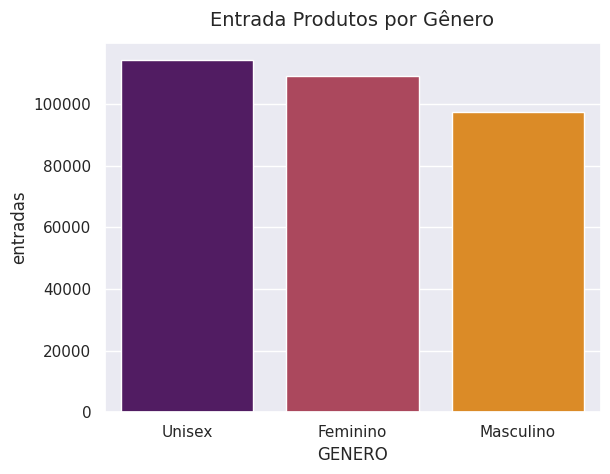

In [105]:
sns.barplot(data=entrada_genero, x=entrada_genero['GENERO'], y=entrada_genero['entradas'], palette='inferno');
plt.title('Entrada Produtos por Gênero', pad=12, fontdict={'fontsize':14})
plt.show()

##### Há uma entrada maior de produtos Unisex, seguido do gênero feminino e por último masculino.

#### Total de saídas por gênero

In [101]:
saida_genero = data.groupby(by=(data['GENERO'])).agg(saidas=('TOTAL DE SAIDA', np.sum)).reset_index().sort_values(by='saidas', ascending=False)
saida_genero

,GENERO,saidas
2,Unisex,38222
0,Feminino,34640
1,Masculino,33060


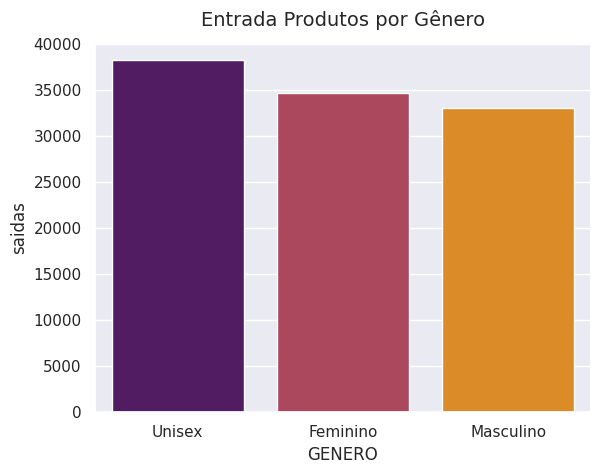

In [106]:
sns.barplot(data=saida_genero, x=saida_genero['GENERO'], y=saida_genero['saidas'], palette='inferno');
plt.title('Entrada Produtos por Gênero', pad=12, fontdict={'fontsize':14})
plt.show()

##### As saídas por gênero seguem a tendência das entradas com mais saídas Unisex

#### Total de saída por coleção

In [108]:
saida_colecao = data.groupby(by='COLEÇÃO').agg(total=('TOTAL DE SAIDA', sum)).reset_index().sort_values(by=('total'), ascending=False)
saida_colecao

,COLEÇÃO,total
0,Edição Limitada,28253
3,Verao,27024
2,Outono,26140
1,Inverno,24505


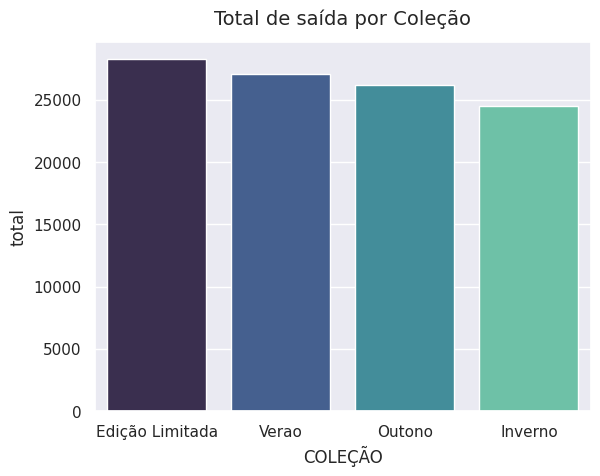

In [109]:
sns.barplot(data=saida_colecao, x='COLEÇÃO', y='total', palette='mako');
plt.title('Total de saída por Coleção', pad=12, fontdict={'fontsize':14})
plt.show()

##### Edição limitada com mais saídas, seguido por verão... O que justifica pelo fato das vendas analisadas serem nos primeiros 5 meses dos anos, já que são meses quentes.

#### Valor Unitário por Coleção

In [28]:
unitario_colecao = data.groupby('COLEÇÃO').agg(soma=('VALOR UNITARIO', sum)).reset_index()
unitario_colecao

,COLEÇÃO,soma
0,Edição Limitada,12557.3
1,Inverno,6957.1
2,Outono,7567.0
3,Verao,7516.0


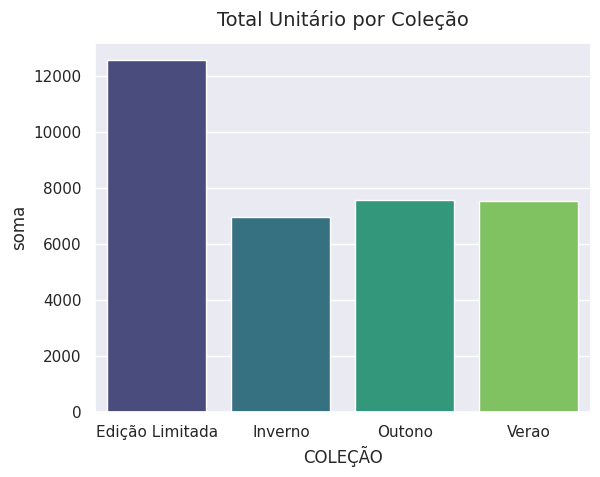

In [29]:
sns.barplot(data=unitario_colecao, x='COLEÇÃO', y='soma', palette='viridis');
plt.title('Total Unitário por Coleção', pad=12, fontdict={'fontsize':14})
plt.show()

##### Total unitário de Edição Limitada bem maior que as outras coleções.

### - Prazo Médio de Entregas e por Produto

In [ ]:
data['DIAS NO ESTOQUE'].describe() # Exibindo todas as métricas da coluna

count    1603.000000
mean       19.756082
std        10.715467
min         2.000000
25%        10.000000
50%        20.000000
75%        29.000000
max        38.000000
Name: DIAS NO ESTOQUE, dtype: float64

In [107]:
media_dias_prod = data.groupby('NOME PROD').agg(media=('DIAS NO ESTOQUE', np.mean)).reset_index().sort_values('media', ascending=False).round(2)
media_dias_prod

,NOME PROD,media
43,TOALHA HAVAIANAS ANIMALS,24.33
21,CAPA HAVAIANAS SIL CELULAR 4,23.50
42,SANDALIA HAVAIANAS TROPICAL C/ KIT,23.48
51,TOALHA HAVAIANAS VELUDO BICOLOR M,22.81
18,BLUSA M/C HAVAIANAS JAPONESA,22.58
27,CHAVEIRO HAVAIANAS ORIGINE,22.07
22,CAPA HAVAIANAS TABLET,21.75
38,SANDALIA HAVAIANAS KIDS MONSTERS,21.69
9,BLUSA HAVAIANAS OMBRO DESL REDE CESTARIA,21.64
39,SANDALIA HAVAIANAS KIDS RADICAL,21.56


In [32]:
len(media_dias_prod['NOME PROD']) # Confirmando que está trazendo os produtos distintos

52

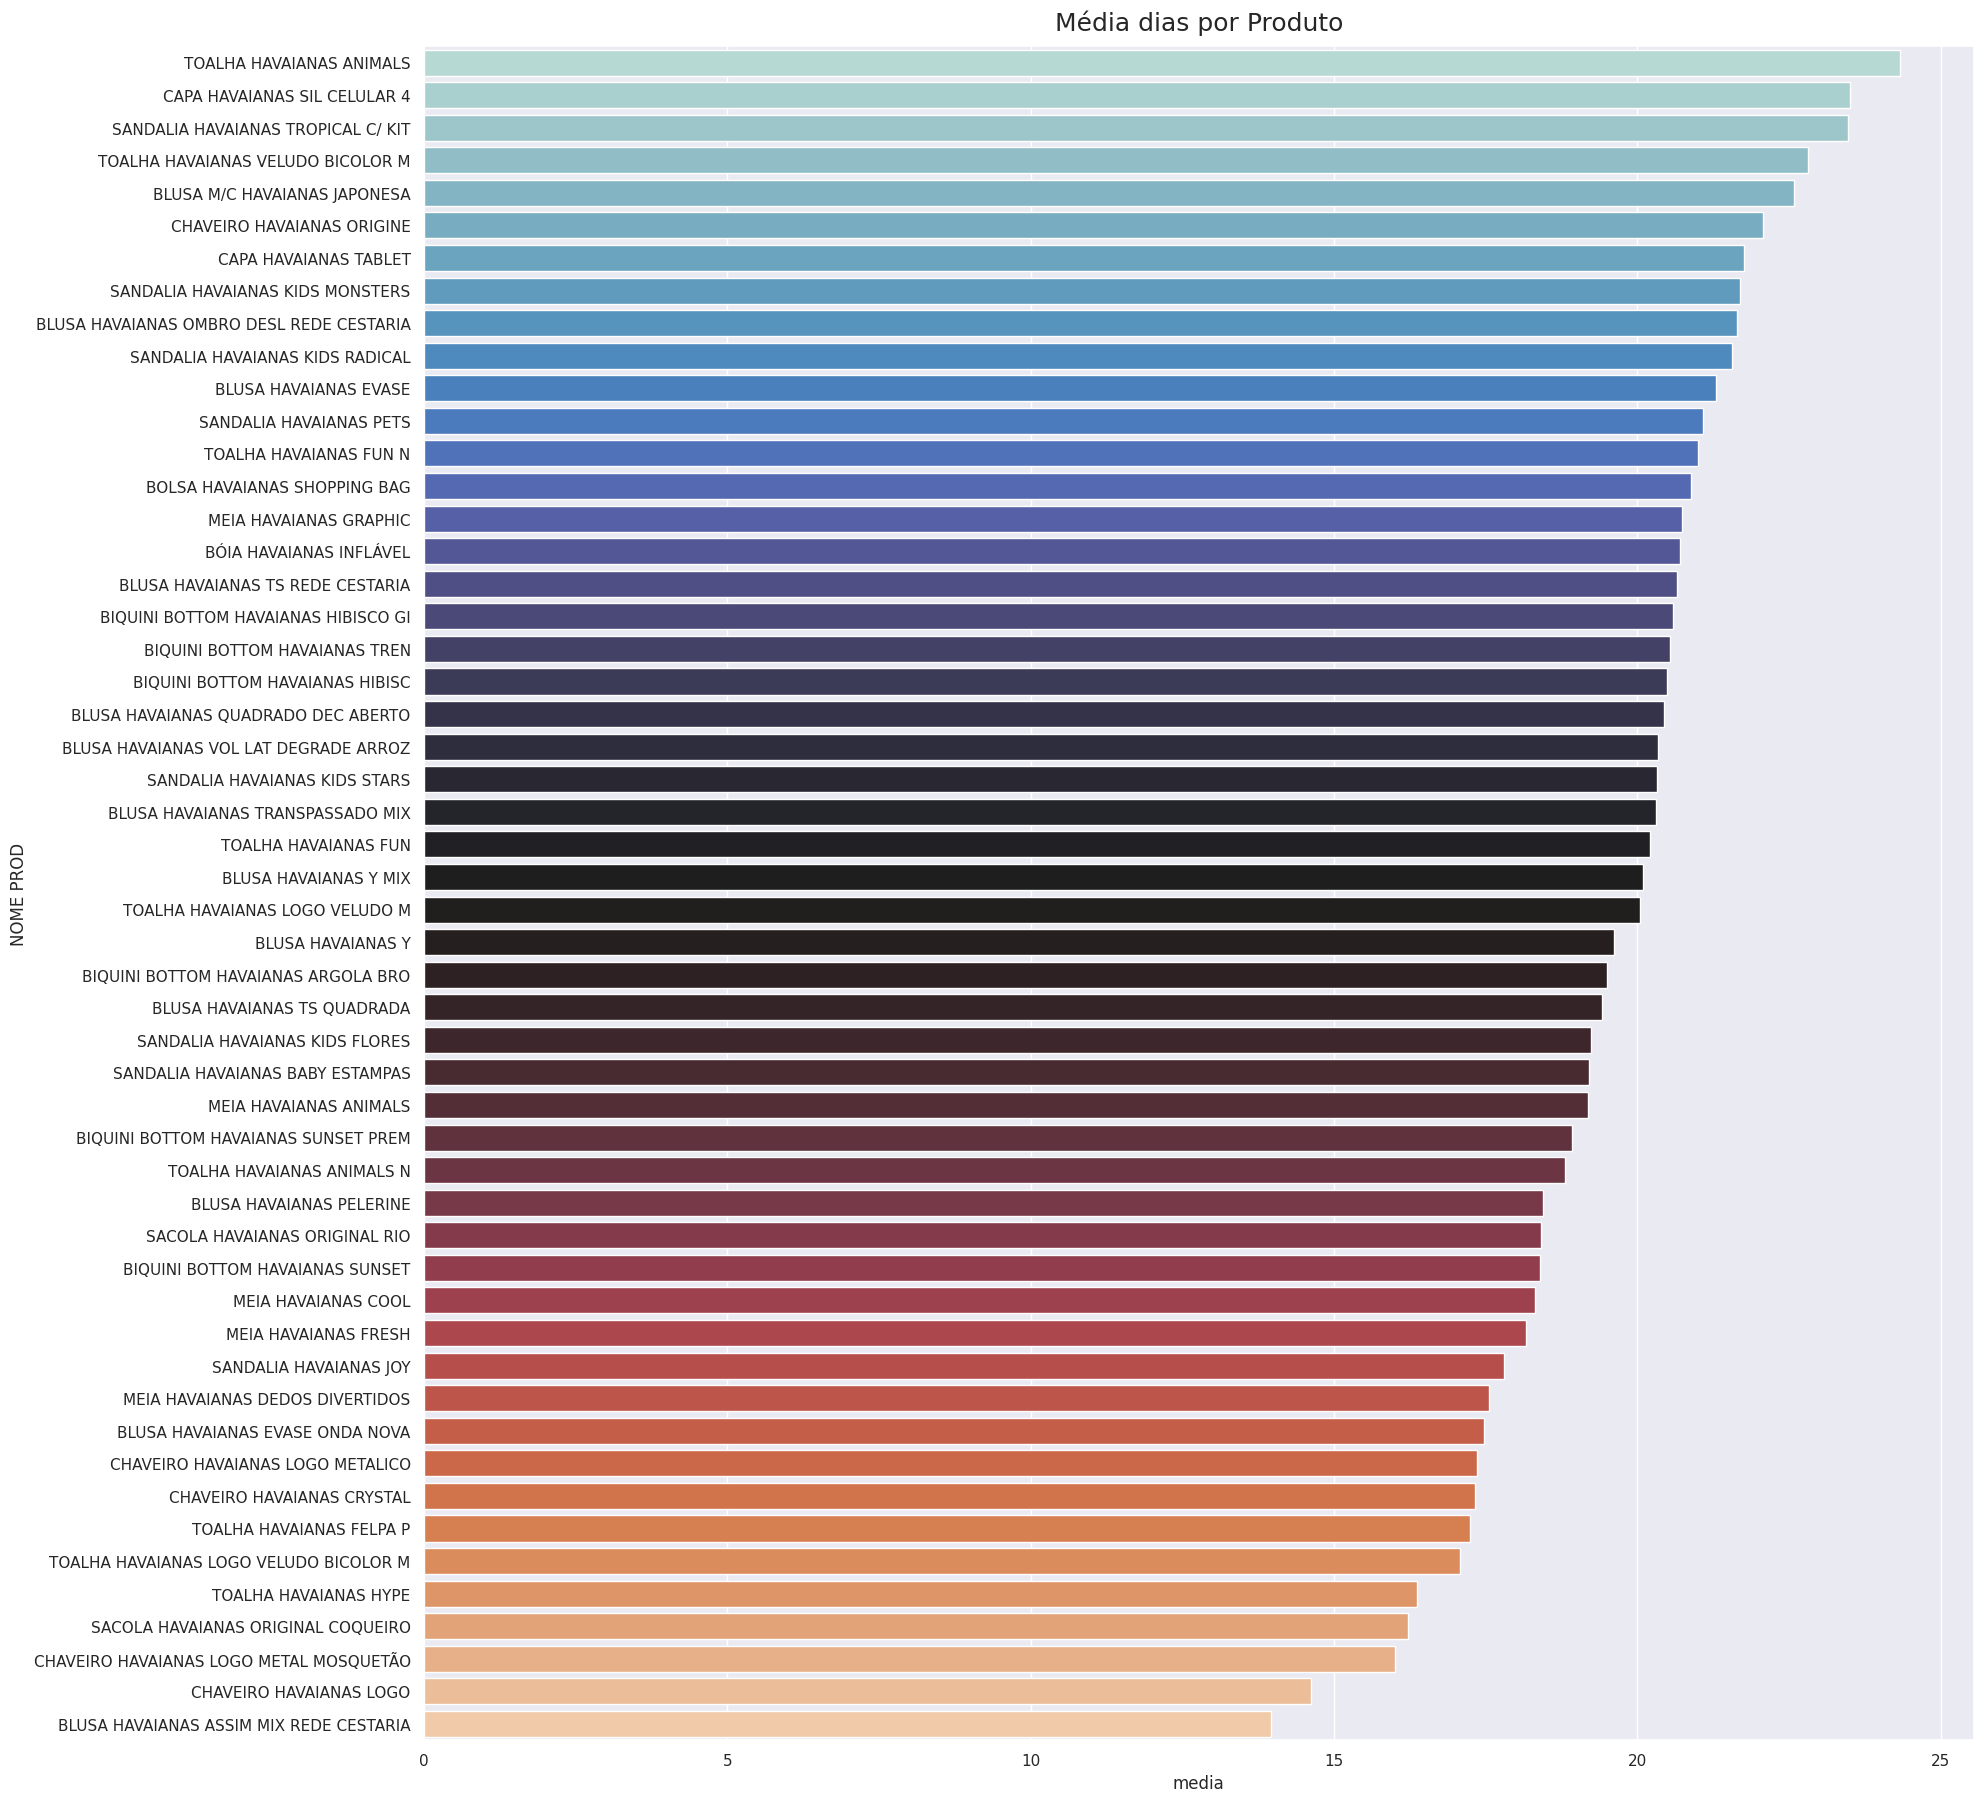

In [139]:
plt.figure(figsize=(20,22)) # Definindo o tamanho do gráfico
sns.barplot(data=media_dias_prod, x='media', y='NOME PROD', orient='h', palette='icefire');
plt.title('Média dias por Produto', pad=12, fontdict={'fontsize':18}) # Definindo o título
plt.show()

##### Com este gráfico é possível ter uma noção de produtos que ficam em média mais ou menos dias no estoque.

### - Faturamentos e faturamento por Loja/Filial

In [34]:
round(sum(data['FAT. Bruto']), 2) # Soma Faturamento Bruto

2287642.5

In [35]:
round(sum(data['FAT. LIQUI']), 2) # Soma Faturamento Líquido

2236285.8

In [36]:
fat_loja_filial = data.groupby('LOJA/FILIAL').agg(Fat=('FAT. LIQUI', sum)).reset_index()
fat_loja_filial

,LOJA/FILIAL,Fat
0,Franquia,1116237.1
1,Loja Própria,1120048.7


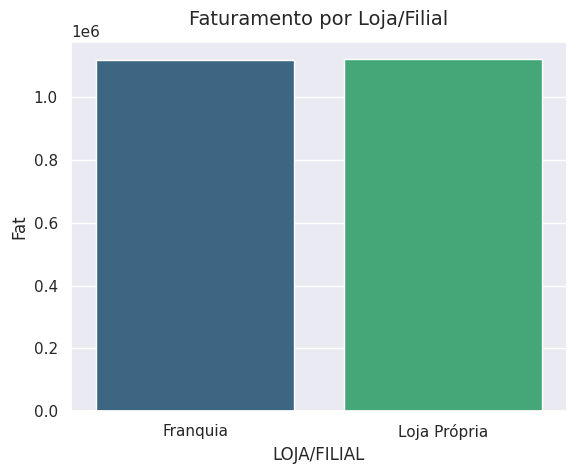

In [37]:
sns.barplot(data=fat_loja_filial, x='LOJA/FILIAL', y='Fat', palette='viridis');
plt.title('Faturamento por Loja/Filial', pad=12, fontdict={'fontsize':14})
plt.show()

##### Valores muito próximos, com a tabela notamos uma diferença de aproximadamente R$3.800,00.

### - Entradas e Saídas Adulto/Infantil

In [38]:
adulto_infantil = data.groupby(by=(data['ADULTO/INFANTIL'])).agg(
    entrada=('ENTRADA ESTOQUE', np.sum),
    saida=('TOTAL DE SAIDA', np.sum)).reset_index().sort_values(by='saida', ascending=False)

In [39]:
adulto_infantil

,ADULTO/INFANTIL,entrada,saida
1,Infantil,164214,53820
0,Adulto,156317,52102


In [40]:
entradas = adulto_infantil['entrada'].to_list()
entradas

[164214, 156317]

In [41]:
saidas = adulto_infantil['saida'].to_list()
saidas

[53820, 52102]

In [42]:
indice = adulto_infantil['ADULTO/INFANTIL'].to_list()
indice

['Infantil', 'Adulto']

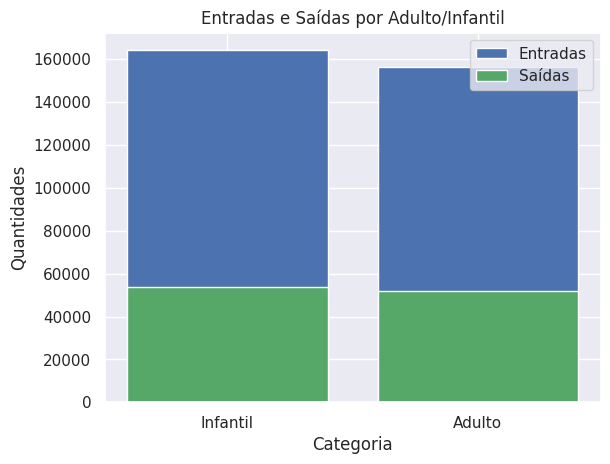

In [43]:
#plt.figure(figsize=(10,8))

plt.bar(indice, entradas, label='Entradas', color='b')
plt.bar(indice, saidas, label='Saídas', color='g')

plt.ylabel('Quantidades')
plt.xlabel('Categoria')
plt.title('Entradas e Saídas por Adulto/Infantil')
plt.legend()

plt.show()

##### Valores muito parecidos tanto de entrada como de saídas, destaque para uma maior entrada de produtos infantis.

### - Entradas e Saídas por Número/Calçado

##### Como são muitos produtos com várias numerações, foi feito um top 30, assim pode-se ter uma noção de produtos e suas numerações com mais saídas e entradas.

##### 30 primeiros registros ordenados pela quantidade de saídas.

In [44]:
data.head()

,DATA ENTRADA,DATA ULTIMA SAIDA,DIAS NO ESTOQUE,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI
0,2017-01-02,2017-01-27,25,Loja Própria,Adulto,Masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,Outono,21.9,36.9,1576.8,1539.9
1,2017-01-02,2017-01-08,6,Loja Própria,Infantil,Feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,Verao,16.9,25.9,1470.3,1444.4
2,2017-01-02,2017-01-15,13,Loja Própria,Infantil,Unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,Verao,19.0,25.9,779.0,753.1
3,2017-01-02,2017-02-05,34,Loja Própria,Infantil,Feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,Outono,21.9,36.9,1927.2,1890.3
4,2017-01-02,2017-01-10,8,Franquia,Infantil,Masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,Outono,16.0,26.9,1328.0,1301.1


In [ ]:
agrupamento_num = data.groupby(by=(['NOME PROD', 'NUMERACAO/CALC'])).agg(
    entrada=('ENTRADA ESTOQUE', np.sum),
    saida=('TOTAL DE SAIDA', np.sum)).reset_index().sort_values(by=('saida'),  # No groupby pode ser passado dois parâmetros para analisar, neste caso entradas e saídas.
    ascending=False).head(30)

In [46]:
agrupamento_num

,NOME PROD,NUMERACAO/CALC,entrada,saida
88,BIQUINI BOTTOM HAVAIANAS HIBISCO GI,45,1877,550
123,BIQUINI BOTTOM HAVAIANAS SUNSET PREM,12,891,430
35,BIQUINI BOTTOM HAVAIANAS HIBISC,13,1386,411
73,BIQUINI BOTTOM HAVAIANAS HIBISCO GI,29,1284,380
29,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,43,1117,378
348,BLUSA HAVAIANAS TS QUADRADA,37,922,351
51,BIQUINI BOTTOM HAVAIANAS HIBISC,37,725,333
59,BIQUINI BOTTOM HAVAIANAS HIBISC,45,1055,332
152,BIQUINI BOTTOM HAVAIANAS SUNSET PREM,45,1060,323
635,SACOLA HAVAIANAS ORIGINAL COQUEIRO,17,942,315


In [ ]:
agrupamento_num['NUMERACAO/CALC'].value_counts().reset_index() # Fazendo uma contagem para checar a quantidade de numerações que aparecem no Top 30

,NUMERACAO/CALC,count
0,45,3
1,37,3
2,17,3
3,43,3
4,12,2
5,29,2
6,30,2
7,40,2
8,39,1
9,13,1


In [ ]:
agrupamento_num['NOME PROD'].value_counts().reset_index() # Agora uma contagem de produtos

,NOME PROD,count
0,BIQUINI BOTTOM HAVAIANAS HIBISC,6
1,BIQUINI BOTTOM HAVAIANAS SUNSET PREM,4
2,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,4
3,SANDALIA HAVAIANAS KIDS MONSTERS,4
4,BIQUINI BOTTOM HAVAIANAS HIBISCO GI,3
5,BLUSA HAVAIANAS Y MIX,2
6,BIQUINI BOTTOM HAVAIANAS SUNSET,2
7,BLUSA HAVAIANAS TS QUADRADA,1
8,SANDALIA HAVAIANAS JOY,1
9,SACOLA HAVAIANAS ORIGINAL COQUEIRO,1


### - Faturamento acumulado e Classificação ABC

##### Solicitado pelo cliente uma classificação ABC por produto... Para chegar no resultado, precisa-se de algumas etapas, como o cálculo do faturamento acumulado e também o percentual de participação deste faturamento acumulado, terminando com o gráfico de Pareto.

In [49]:
fat = data.groupby('NOME PROD')['FAT. LIQUI']
fat = pd.DataFrame(fat.sum()).reset_index().sort_values(by='FAT. LIQUI', ascending=False)
fat

,NOME PROD,FAT. LIQUI
4,BIQUINI BOTTOM HAVAIANAS SUNSET PREM,100856.8
1,BIQUINI BOTTOM HAVAIANAS HIBISC,97576.1
0,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,79507.6
3,BIQUINI BOTTOM HAVAIANAS SUNSET,73145.2
36,SANDALIA HAVAIANAS JOY,72220.5
38,SANDALIA HAVAIANAS KIDS MONSTERS,69946.8
2,BIQUINI BOTTOM HAVAIANAS HIBISCO GI,68692.9
37,SANDALIA HAVAIANAS KIDS FLORES,59415.5
40,SANDALIA HAVAIANAS KIDS STARS,57553.7
15,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,57202.2


In [50]:
type(fat)

pandas.core.frame.DataFrame

In [ ]:
fat['ACUMULADO'] = fat['FAT. LIQUI'].cumsum() # cumsum retorna o faturamento acumulado dos produtos
fat

,NOME PROD,FAT. LIQUI,ACUMULADO
4,BIQUINI BOTTOM HAVAIANAS SUNSET PREM,100856.8,100856.8
1,BIQUINI BOTTOM HAVAIANAS HIBISC,97576.1,198432.9
0,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,79507.6,277940.5
3,BIQUINI BOTTOM HAVAIANAS SUNSET,73145.2,351085.7
36,SANDALIA HAVAIANAS JOY,72220.5,423306.2
38,SANDALIA HAVAIANAS KIDS MONSTERS,69946.8,493253.0
2,BIQUINI BOTTOM HAVAIANAS HIBISCO GI,68692.9,561945.9
37,SANDALIA HAVAIANAS KIDS FLORES,59415.5,621361.4
40,SANDALIA HAVAIANAS KIDS STARS,57553.7,678915.1
15,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,57202.2,736117.3


In [ ]:
fat['PERCENT_ACUMULADO'] = round(fat['ACUMULADO']/fat['FAT. LIQUI'].sum(), 4) * 100 # Calculo para retornar a %
fat

,NOME PROD,FAT. LIQUI,ACUMULADO,PERCENT_ACUMULADO
4,BIQUINI BOTTOM HAVAIANAS SUNSET PREM,100856.8,100856.8,4.51
1,BIQUINI BOTTOM HAVAIANAS HIBISC,97576.1,198432.9,8.87
0,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,79507.6,277940.5,12.43
3,BIQUINI BOTTOM HAVAIANAS SUNSET,73145.2,351085.7,15.70
36,SANDALIA HAVAIANAS JOY,72220.5,423306.2,18.93
38,SANDALIA HAVAIANAS KIDS MONSTERS,69946.8,493253.0,22.06
2,BIQUINI BOTTOM HAVAIANAS HIBISCO GI,68692.9,561945.9,25.13
37,SANDALIA HAVAIANAS KIDS FLORES,59415.5,621361.4,27.79
40,SANDALIA HAVAIANAS KIDS STARS,57553.7,678915.1,30.36
15,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,57202.2,736117.3,32.92


In [ ]:
list = [] # Criando uma lista vazia

for x in fat['PERCENT_ACUMULADO']:   # Laço for com condicionais para classificação ABC, armazenando em uma lista que irá ser uma nova coluna
    if x <= 80:
        list.append('A')
    elif x <= 90:
        list.append('B') # append para 'adicionar' os itens a lista que está vazia (primeira linha do código)
    else:
        list.append('C')

In [54]:
list

['A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C']

In [ ]:
fat['CLASSIFICACAO_ABC'] = list # Criando uma nova coluna com a lista

In [114]:
fat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 4 to 34
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NOME PROD          52 non-null     object 
 1   FAT. LIQUI         52 non-null     float64
 2   ACUMULADO          52 non-null     float64
 3   PERCENT_ACUMULADO  52 non-null     float64
 4   CLASSIFICACAO_ABC  52 non-null     object 
dtypes: float64(3), object(2)
memory usage: 2.4+ KB


In [56]:
fat

,NOME PROD,FAT. LIQUI,ACUMULADO,PERCENT_ACUMULADO,CLASSIFICACAO_ABC
4,BIQUINI BOTTOM HAVAIANAS SUNSET PREM,100856.8,100856.8,4.51,A
1,BIQUINI BOTTOM HAVAIANAS HIBISC,97576.1,198432.9,8.87,A
0,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,79507.6,277940.5,12.43,A
3,BIQUINI BOTTOM HAVAIANAS SUNSET,73145.2,351085.7,15.70,A
36,SANDALIA HAVAIANAS JOY,72220.5,423306.2,18.93,A
38,SANDALIA HAVAIANAS KIDS MONSTERS,69946.8,493253.0,22.06,A
2,BIQUINI BOTTOM HAVAIANAS HIBISCO GI,68692.9,561945.9,25.13,A
37,SANDALIA HAVAIANAS KIDS FLORES,59415.5,621361.4,27.79,A
40,SANDALIA HAVAIANAS KIDS STARS,57553.7,678915.1,30.36,A
15,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,57202.2,736117.3,32.92,A


### Diagrama de Pareto

##### O Diagrama de Pareto é um gráfico de colunas que ordena as frequências das ocorrências, da maior para a menor, priorizando as ocorrências.
##### Neste caso, o diagrama mostra o percentual de participação dos produtos no faturamento total.

In [57]:
import matplotlib.ticker as mtick

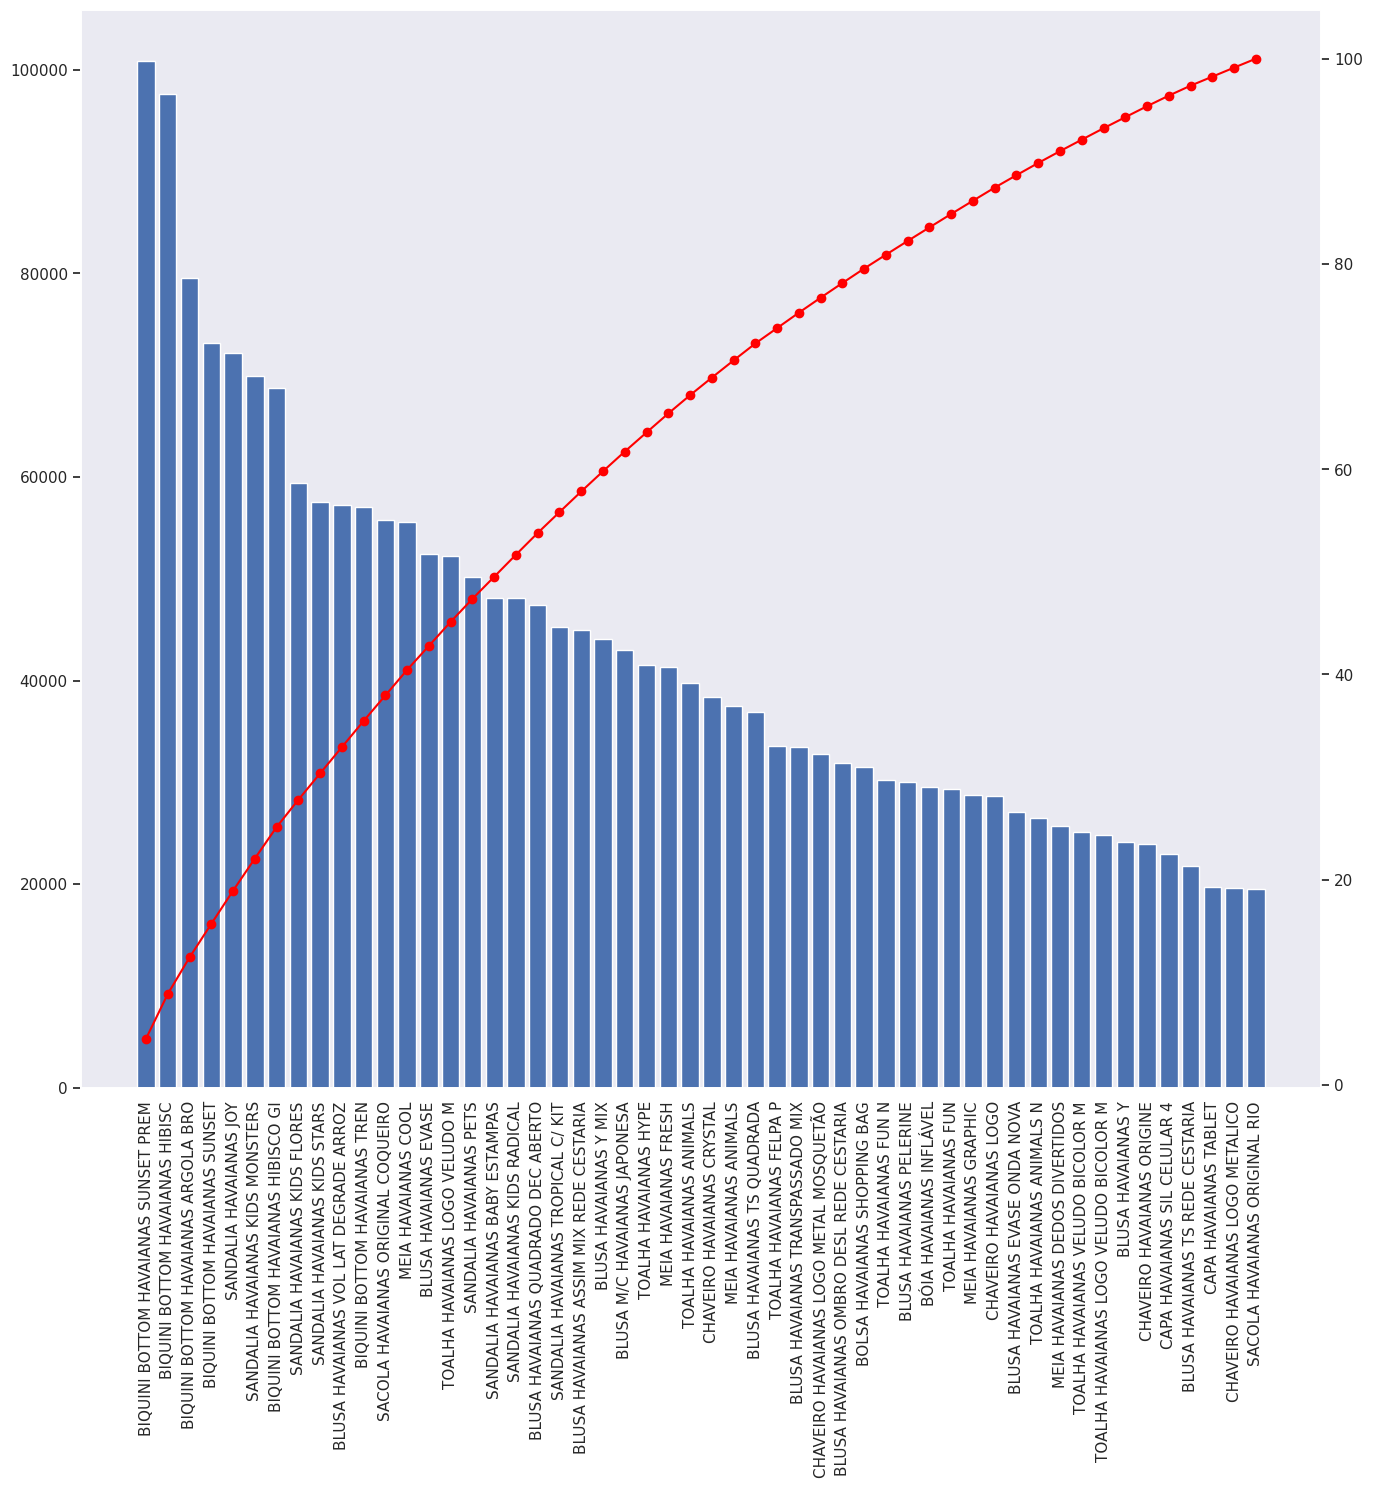

In [135]:
fig, ax = plt.subplots(figsize=(16,14))
ax2 = ax.twinx()

ax.bar(fat['NOME PROD'], fat['FAT. LIQUI'])
ax2.plot(fat['NOME PROD'], fat['PERCENT_ACUMULADO'], color="red", marker='o')
ax.tick_params(axis="x", rotation=90)

ax.grid(False)
ax2.grid(False)

#for i, percentual in enumerate(fat['PERCENT_ACUMULADO']):
    #ax2.annotate(f"{percentual:.0%%}", (i, percentual), textcoords="offset points", xytext=(0, 10), ha="center", color="C1", fontweight="bold")

#ax2.yaxis.set_major_formatter(mtick.PercentFormatter('%.0f%%'))

#xticks = mtick.FormatStrFormatter('%.0f%%')
#ax2.xaxis.set_major_formatter(xticks)

plt.show()

### - Mapa de calor para medir a correlação entre as colunas

##### A intenção seria viabilizar um estudo para realizar uma regressão linear, prevendo faturamentos futuros, mas como os dados estão muito espaçados e sem um padrão, não seria uma boa prática.

In [59]:
data_numerica = data.select_dtypes(include=np.number) 

In [60]:
data_numerica.head()

,DIAS NO ESTOQUE,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI
0,25,43,346,72,7238,21.9,36.9,1576.8,1539.9
1,6,24,155,87,5215,16.9,25.9,1470.3,1444.4
2,13,26,330,41,5218,19.0,25.9,779.0,753.1
3,34,16,54,88,7235,21.9,36.9,1927.2,1890.3
4,8,12,165,83,7234,16.0,26.9,1328.0,1301.1


In [61]:
correlacao = data_numerica.corr()
correlacao

,DIAS NO ESTOQUE,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI
DIAS NO ESTOQUE,1.000000,0.028085,0.039228,0.056732,-0.027805,-0.039199,-0.017986,0.016448,0.016750
NUMERACAO/CALC,0.028085,1.000000,-0.028509,-0.056188,-0.042400,-0.016023,-0.025732,-0.049219,-0.049271
ENTRADA ESTOQUE,0.039228,-0.028509,1.000000,0.010612,-0.021313,-0.029678,-0.037527,-0.010408,-0.010077
TOTAL DE SAIDA,0.056732,-0.056188,0.010612,1.000000,0.025751,0.009602,0.021411,0.712013,0.716515
ID_PROD,-0.027805,-0.042400,-0.021313,0.025751,1.000000,0.709806,0.618442,0.497931,0.494634
VALOR UNITARIO,-0.039199,-0.016023,-0.029678,0.009602,0.709806,1.000000,0.902274,0.683959,0.678867
VALOR REPASSE,-0.017986,-0.025732,-0.037527,0.021411,0.618442,0.902274,1.000000,0.625357,0.618831
FAT. Bruto,0.016448,-0.049219,-0.010408,0.712013,0.497931,0.683959,0.625357,1.000000,0.999965
FAT. LIQUI,0.016750,-0.049271,-0.010077,0.716515,0.494634,0.678867,0.618831,0.999965,1.000000


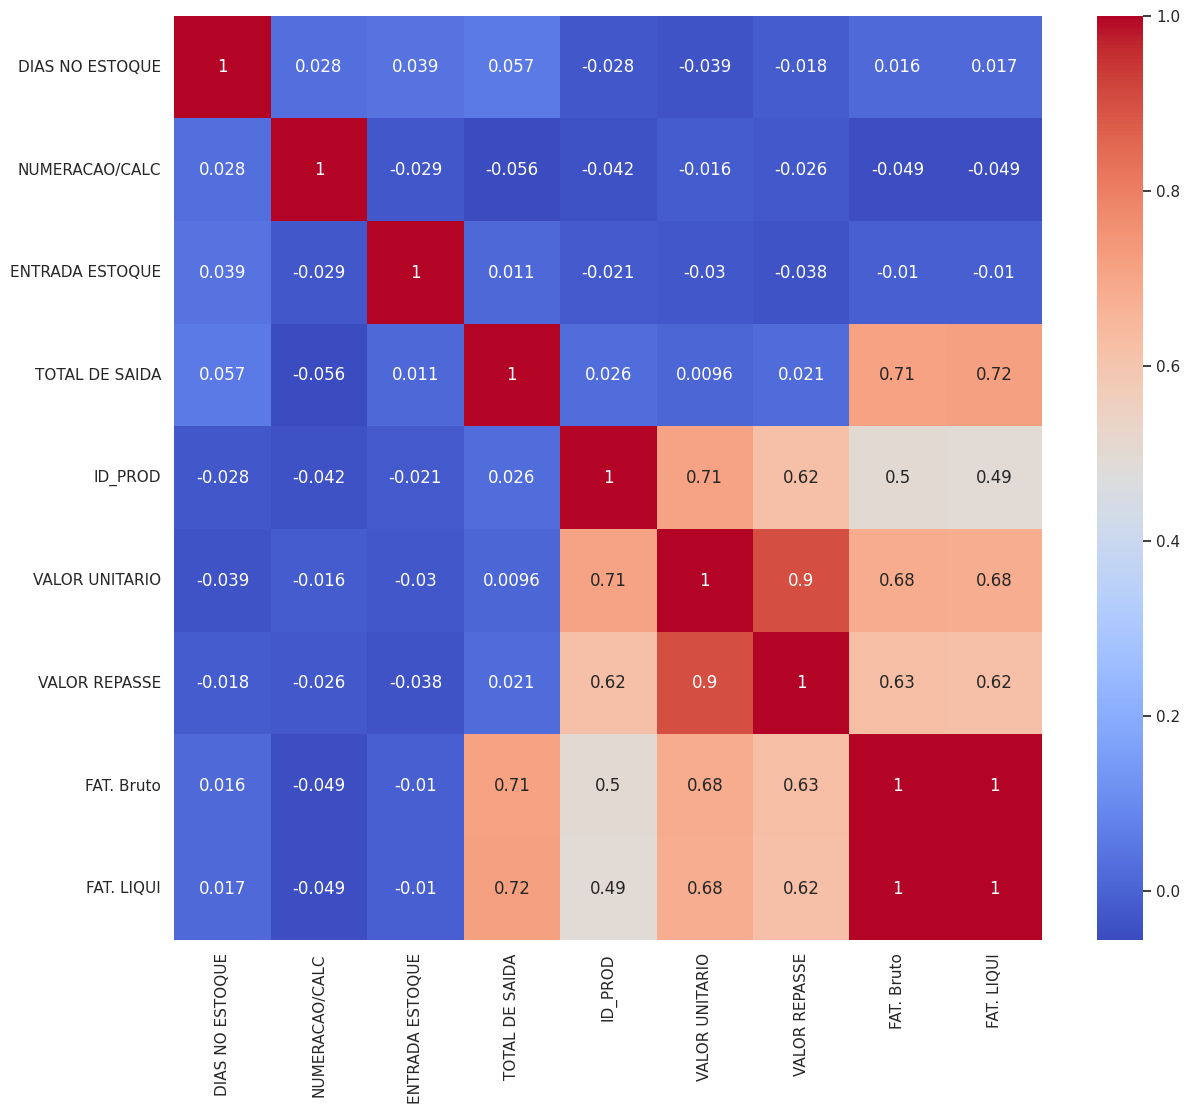

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(data=correlacao, cmap = 'coolwarm', annot=True) # annot para exibir o percentual
plt.show()

##### Como nota-se no gráfico a única coluna que tem uma forte correlação com a coluna de faturamento líquido, é a "TOTAL DE SAIDA" (o que é um tanto óbvio, já que o cálculo de faturamento vem desta coluna), seria possível caso os dados não fossem tão espaçados, fazer uma Regrassão Linear Simples.

In [63]:
data.head()

,DATA ENTRADA,DATA ULTIMA SAIDA,DIAS NO ESTOQUE,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI
0,2017-01-02,2017-01-27,25,Loja Própria,Adulto,Masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,Outono,21.9,36.9,1576.8,1539.9
1,2017-01-02,2017-01-08,6,Loja Própria,Infantil,Feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,Verao,16.9,25.9,1470.3,1444.4
2,2017-01-02,2017-01-15,13,Loja Própria,Infantil,Unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,Verao,19.0,25.9,779.0,753.1
3,2017-01-02,2017-02-05,34,Loja Própria,Infantil,Feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,Outono,21.9,36.9,1927.2,1890.3
4,2017-01-02,2017-01-10,8,Franquia,Infantil,Masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,Outono,16.0,26.9,1328.0,1301.1


### ScatterPlot

##### ScatterPlot ou Gráfico de dispersão, confirma o que se vê no HeatMap, pontos muito unidos em uma forma de linha mostra uma forte correlação, pontos totalmente dispersos no gráfico mostra uma fraca correlação.

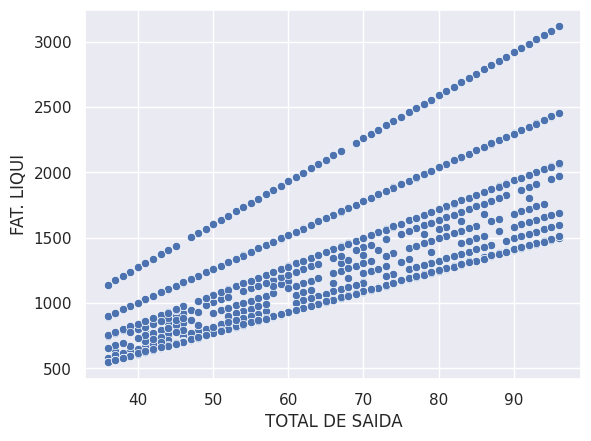

In [ ]:
# Scatterplot para demonstrar a forte correlação entre as colunas
sns.scatterplot(data=data, x='TOTAL DE SAIDA', y='FAT. LIQUI');

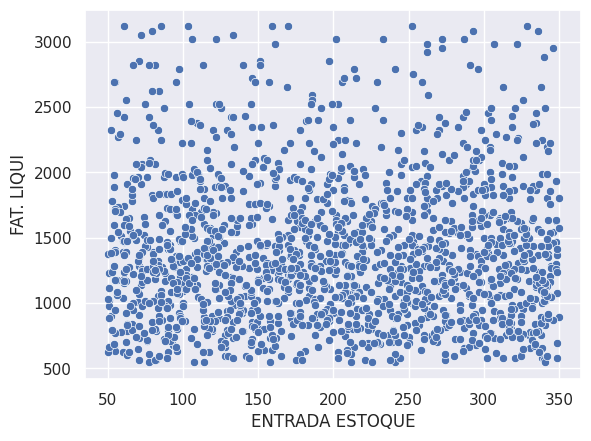

In [65]:
# Scatterplot para demonstrar a Fraca correlação entre as colunas
sns.scatterplot(data=data, x='ENTRADA ESTOQUE', y='FAT. LIQUI');

### - Analisando saídas por períodos

In [66]:
data.head()

,DATA ENTRADA,DATA ULTIMA SAIDA,DIAS NO ESTOQUE,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI
0,2017-01-02,2017-01-27,25,Loja Própria,Adulto,Masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,Outono,21.9,36.9,1576.8,1539.9
1,2017-01-02,2017-01-08,6,Loja Própria,Infantil,Feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,Verao,16.9,25.9,1470.3,1444.4
2,2017-01-02,2017-01-15,13,Loja Própria,Infantil,Unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,Verao,19.0,25.9,779.0,753.1
3,2017-01-02,2017-02-05,34,Loja Própria,Infantil,Feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,Outono,21.9,36.9,1927.2,1890.3
4,2017-01-02,2017-01-10,8,Franquia,Infantil,Masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,Outono,16.0,26.9,1328.0,1301.1


In [ ]:
data['ANO'] = data['DATA ULTIMA SAIDA'].dt.year # Criando uma coluna a partir da extração do ano de outra coluna

In [ ]:
data['MES'] = data['DATA ULTIMA SAIDA'].dt.month # Criando uma nova coluna a partir da extração do mês de outra coluna

In [ ]:
data.groupby(by=['COLEÇÃO','ANO','MES'] ).agg(saidas=('TOTAL DE SAIDA', sum)) # Agrupando por três colunas diferentes, o agrupamento ocorre na ordem que é escrita as colunas

saidas
COLEÇÃO         ANO  MES        
Edição Limitada 2017 1     11046
                     2     14229
                     3      2829
                     4        79
                     5        70
Inverno         2020 1      9168
                     2     13036
                     3      2228
                     4        73
Outono          2017 1      9315
                     2     14459
                     3      2311
                     4        55
Verao           2017 1     10508
                     2     13952
                     3      2564

##### Através da tabela, nota-se um número maior de saídas nos primeiros três meses, com destaque para o mês dois, uma possível explicação seria que os produtos da Havaianas tendem a ser mais alegres, coloridos, informais e estes são meses mais festivos, de férias, com Reveillon em Janeiro e Carnaval em Fevereiro, tanto que do mês três em diante, a queda é significativa. Mais pra frente haverá uma análise especifica sobre o ano de 2020.

### -  Analisando Faturamento por período

##### Como solicitado pelo cliente, foi feito um comparativo entre os anos de 2017 e 2020, para ver qual gerente perfermou melhor.

In [70]:
data.head()

,DATA ENTRADA,DATA ULTIMA SAIDA,DIAS NO ESTOQUE,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI,ANO,MES
0,2017-01-02,2017-01-27,25,Loja Própria,Adulto,Masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,Outono,21.9,36.9,1576.8,1539.9,2017,1
1,2017-01-02,2017-01-08,6,Loja Própria,Infantil,Feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,Verao,16.9,25.9,1470.3,1444.4,2017,1
2,2017-01-02,2017-01-15,13,Loja Própria,Infantil,Unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,Verao,19.0,25.9,779.0,753.1,2017,1
3,2017-01-02,2017-02-05,34,Loja Própria,Infantil,Feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,Outono,21.9,36.9,1927.2,1890.3,2017,2
4,2017-01-02,2017-01-10,8,Franquia,Infantil,Masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,Outono,16.0,26.9,1328.0,1301.1,2017,1


In [71]:
faturamento = data.groupby(by=(['ANO','MES'])).agg(faturamento=('FAT. LIQUI', sum)).reset_index()
faturamento

,ANO,MES,faturamento
0,2017,1,675224.2
1,2017,2,933114.9
2,2017,3,171963.3
3,2017,4,3389.9
4,2017,5,1780.1
5,2020,1,165490.2
6,2020,2,242970.7
7,2020,3,40863.7
8,2020,4,1488.8


In [72]:
meses = faturamento['MES'].iloc[:4].unique().tolist()
meses

[1, 2, 3, 4]

In [73]:
anos = faturamento['ANO'].unique().tolist()
anos

[2017, 2020]

In [74]:
fat_17 = faturamento[faturamento['ANO']==2017]
fat_17 = fat_17['faturamento'].iloc[:4].round(2).tolist()
fat_17

[675224.2, 933114.9, 171963.3, 3389.9]

In [75]:
fat_20 = faturamento[faturamento['ANO']==2020]
fat_20 = fat_20['faturamento'].round(2).tolist()
fat_20

[165490.2, 242970.7, 40863.7, 1488.8]

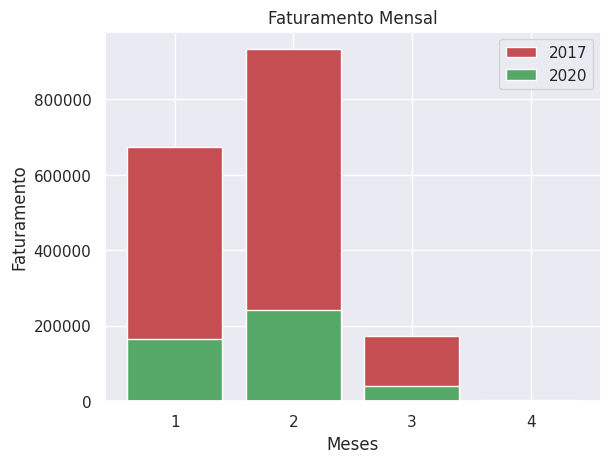

In [76]:
plt.bar(meses, fat_17, label='2017', color='r')
plt.bar(meses, fat_20, label='2020', color='g')

plt.ylabel('Faturamento')
plt.xlabel('Meses')
plt.title('Faturamento Mensal')
plt.legend()

plt.xticks(meses)

plt.show()

##### Nota-se uma performance bem melhor no período de 2017, comparado a 2020... Porém vale ressaltar, que em 2020 tivemos a Pandemia, decorrente do Corona vírus, o que pode ter impactado negativamente a performance da empresa nesse período, que aliás pode-se justificar ter faturmantos relacionados apenas à produtos da coleção de Inverno, talvez sido uma queima de estoque de um período anterior, já que foram comercializados produtos de inverno em meses mais quentes.

### - Produtos com mais e menos saídas

In [ ]:
data.groupby(by=('NOME PROD')).agg(
    entrada=('ENTRADA ESTOQUE', np.sum),
    saida=('TOTAL DE SAIDA', np.sum)).reset_index().sort_values(by=('saida'),
    ascending=False).head(1) # Ordenando de forma descendete pela saída

,NOME PROD,entrada,saida
1,BIQUINI BOTTOM HAVAIANAS HIBISC,17592,5246


In [ ]:
data.groupby(by=('NOME PROD')).agg(
    entrada=('ENTRADA ESTOQUE', np.sum),
    saida=('TOTAL DE SAIDA', np.sum)).reset_index().sort_values(by=('saida'),
    ascending=True).head(1) # Ordenando de forma ascendente

,NOME PROD,entrada,saida
34,SACOLA HAVAIANAS ORIGINAL RIO,2225,769


### -- Analisando participações por Número/Calçado

##### A intenção é mostrar a participação das numerações no faturamento da empresa, como há vários produtos com várias númerações diferentes, a técnica utilizada será a de agrupamento (binning).

In [77]:
data.head()

,DATA ENTRADA,DATA ULTIMA SAIDA,DIAS NO ESTOQUE,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI,ANO,MES
0,2017-01-02,2017-01-27,25,Loja Própria,Adulto,Masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,Outono,21.9,36.9,1576.8,1539.9,2017,1
1,2017-01-02,2017-01-08,6,Loja Própria,Infantil,Feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,Verao,16.9,25.9,1470.3,1444.4,2017,1
2,2017-01-02,2017-01-15,13,Loja Própria,Infantil,Unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,Verao,19.0,25.9,779.0,753.1,2017,1
3,2017-01-02,2017-02-05,34,Loja Própria,Infantil,Feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,Outono,21.9,36.9,1927.2,1890.3,2017,2
4,2017-01-02,2017-01-10,8,Franquia,Infantil,Masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,Outono,16.0,26.9,1328.0,1301.1,2017,1


In [ ]:
data_copia = data.copy() # Criando uma cópia da tabela original
data_copia.head()

,DATA ENTRADA,DATA ULTIMA SAIDA,DIAS NO ESTOQUE,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI,ANO,MES
0,2017-01-02,2017-01-27,25,Loja Própria,Adulto,Masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,Outono,21.9,36.9,1576.8,1539.9,2017,1
1,2017-01-02,2017-01-08,6,Loja Própria,Infantil,Feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,Verao,16.9,25.9,1470.3,1444.4,2017,1
2,2017-01-02,2017-01-15,13,Loja Própria,Infantil,Unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,Verao,19.0,25.9,779.0,753.1,2017,1
3,2017-01-02,2017-02-05,34,Loja Própria,Infantil,Feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,Outono,21.9,36.9,1927.2,1890.3,2017,2
4,2017-01-02,2017-01-10,8,Franquia,Infantil,Masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,Outono,16.0,26.9,1328.0,1301.1,2017,1


In [ ]:
data_copia['AGRUPAMENTO_NUM'] = pd.qcut(data_copia['NUMERACAO/CALC'], q = 6, precision=0)

# Criando uma coluna com o agrupamento, qcut é a função do pandas, q é a quantidade de grupos, precision determina o número de casas decimais

In [80]:
data_copia

,DATA ENTRADA,DATA ULTIMA SAIDA,DIAS NO ESTOQUE,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI,ANO,MES,AGRUPAMENTO_NUM
0,2017-01-02,2017-01-27,25,Loja Própria,Adulto,Masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,Outono,21.9,36.9,1576.8,1539.9,2017,1,"(41.0, 46.0]"
1,2017-01-02,2017-01-08,6,Loja Própria,Infantil,Feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,Verao,16.9,25.9,1470.3,1444.4,2017,1,"(23.0, 29.0]"
2,2017-01-02,2017-01-15,13,Loja Própria,Infantil,Unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,Verao,19.0,25.9,779.0,753.1,2017,1,"(23.0, 29.0]"
3,2017-01-02,2017-02-05,34,Loja Própria,Infantil,Feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,Outono,21.9,36.9,1927.2,1890.3,2017,2,"(9.0, 17.0]"
4,2017-01-02,2017-01-10,8,Franquia,Infantil,Masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,Outono,16.0,26.9,1328.0,1301.1,2017,1,"(9.0, 17.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,2020-03-29,2020-04-09,11,Franquia,Infantil,Unisex,25,342,73,6228,SANDALIA HAVAIANAS TROPICAL C/ KIT,Inverno,20.9,36.9,1525.7,1488.8,2020,4,"(23.0, 29.0]"
1599,2017-03-29,2017-05-04,36,Loja Própria,Infantil,Feminino,26,207,70,8262,CAPA HAVAIANAS SIL CELULAR 4,Edição Limitada,25.9,32.9,1813.0,1780.1,2017,5,"(23.0, 29.0]"
1600,2017-03-29,2017-04-15,17,Loja Própria,Infantil,Masculino,17,193,55,7240,BLUSA M/C HAVAIANAS JAPONESA,Outono,21.9,36.9,1204.5,1167.6,2017,4,"(9.0, 17.0]"
1601,2017-03-29,2017-04-08,10,Franquia,Adulto,Feminino,41,340,43,8249,TOALHA HAVAIANAS LOGO VELUDO BICOLOR M,Edição Limitada,25.9,32.9,1113.7,1080.8,2017,4,"(35.0, 41.0]"


In [ ]:
sorted(data_copia['AGRUPAMENTO_NUM'].unique()) # Exibindo os agrupamentos feitos

[Interval(9.0, 17.0, closed='right'),
 Interval(17.0, 23.0, closed='right'),
 Interval(23.0, 29.0, closed='right'),
 Interval(29.0, 35.0, closed='right'),
 Interval(35.0, 41.0, closed='right'),
 Interval(41.0, 46.0, closed='right')]

In [136]:
data_copia['AGRUPAMENTO_NUM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1603 entries, 0 to 1602
Series name: AGRUPAMENTO_NUM
Non-Null Count  Dtype 
--------------  ----- 
1603 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [ ]:
data_copia['AGRUPAMENTO_NUM'] = pd.qcut(data_copia['NUMERACAO/CALC'], q = 6, labels=False, precision=0)

# Com o parâmetro labels=False, exibe-se a posição do agrupamento, assim é mais fácil trocar os valores da coluna, a fim de ficar mais legível

In [83]:
data_copia

,DATA ENTRADA,DATA ULTIMA SAIDA,DIAS NO ESTOQUE,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI,ANO,MES,AGRUPAMENTO_NUM
0,2017-01-02,2017-01-27,25,Loja Própria,Adulto,Masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,Outono,21.9,36.9,1576.8,1539.9,2017,1,5
1,2017-01-02,2017-01-08,6,Loja Própria,Infantil,Feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,Verao,16.9,25.9,1470.3,1444.4,2017,1,2
2,2017-01-02,2017-01-15,13,Loja Própria,Infantil,Unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,Verao,19.0,25.9,779.0,753.1,2017,1,2
3,2017-01-02,2017-02-05,34,Loja Própria,Infantil,Feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,Outono,21.9,36.9,1927.2,1890.3,2017,2,0
4,2017-01-02,2017-01-10,8,Franquia,Infantil,Masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,Outono,16.0,26.9,1328.0,1301.1,2017,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,2020-03-29,2020-04-09,11,Franquia,Infantil,Unisex,25,342,73,6228,SANDALIA HAVAIANAS TROPICAL C/ KIT,Inverno,20.9,36.9,1525.7,1488.8,2020,4,2
1599,2017-03-29,2017-05-04,36,Loja Própria,Infantil,Feminino,26,207,70,8262,CAPA HAVAIANAS SIL CELULAR 4,Edição Limitada,25.9,32.9,1813.0,1780.1,2017,5,2
1600,2017-03-29,2017-04-15,17,Loja Própria,Infantil,Masculino,17,193,55,7240,BLUSA M/C HAVAIANAS JAPONESA,Outono,21.9,36.9,1204.5,1167.6,2017,4,0
1601,2017-03-29,2017-04-08,10,Franquia,Adulto,Feminino,41,340,43,8249,TOALHA HAVAIANAS LOGO VELUDO BICOLOR M,Edição Limitada,25.9,32.9,1113.7,1080.8,2017,4,4


In [ ]:
data_copia['AGRUPAMENTO_NUM'] = data_copia['AGRUPAMENTO_NUM'].map({0:'10-17', 1:'17-23', 2:'23-29', 3:'29-35', 4:'35-41', 5:'41-46'})

# Alterando os valores de acordo com as posições

In [85]:
data_copia

,DATA ENTRADA,DATA ULTIMA SAIDA,DIAS NO ESTOQUE,LOJA/FILIAL,ADULTO/INFANTIL,GENERO,NUMERACAO/CALC,ENTRADA ESTOQUE,TOTAL DE SAIDA,ID_PROD,NOME PROD,COLEÇÃO,VALOR UNITARIO,VALOR REPASSE,FAT. Bruto,FAT. LIQUI,ANO,MES,AGRUPAMENTO_NUM
0,2017-01-02,2017-01-27,25,Loja Própria,Adulto,Masculino,43,346,72,7238,BLUSA HAVAIANAS VOL LAT DEGRADE ARROZ,Outono,21.9,36.9,1576.8,1539.9,2017,1,41-46
1,2017-01-02,2017-01-08,6,Loja Própria,Infantil,Feminino,24,155,87,5215,BIQUINI BOTTOM HAVAIANAS ARGOLA BRO,Verao,16.9,25.9,1470.3,1444.4,2017,1,23-29
2,2017-01-02,2017-01-15,13,Loja Própria,Infantil,Unisex,26,330,41,5218,BIQUINI BOTTOM HAVAIANAS HIBISC,Verao,19.0,25.9,779.0,753.1,2017,1,23-29
3,2017-01-02,2017-02-05,34,Loja Própria,Infantil,Feminino,16,54,88,7235,BLUSA HAVAIANAS Y MIX,Outono,21.9,36.9,1927.2,1890.3,2017,2,10-17
4,2017-01-02,2017-01-10,8,Franquia,Infantil,Masculino,12,165,83,7234,BLUSA HAVAIANAS TRANSPASSADO MIX,Outono,16.0,26.9,1328.0,1301.1,2017,1,10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,2020-03-29,2020-04-09,11,Franquia,Infantil,Unisex,25,342,73,6228,SANDALIA HAVAIANAS TROPICAL C/ KIT,Inverno,20.9,36.9,1525.7,1488.8,2020,4,23-29
1599,2017-03-29,2017-05-04,36,Loja Própria,Infantil,Feminino,26,207,70,8262,CAPA HAVAIANAS SIL CELULAR 4,Edição Limitada,25.9,32.9,1813.0,1780.1,2017,5,23-29
1600,2017-03-29,2017-04-15,17,Loja Própria,Infantil,Masculino,17,193,55,7240,BLUSA M/C HAVAIANAS JAPONESA,Outono,21.9,36.9,1204.5,1167.6,2017,4,10-17
1601,2017-03-29,2017-04-08,10,Franquia,Adulto,Feminino,41,340,43,8249,TOALHA HAVAIANAS LOGO VELUDO BICOLOR M,Edição Limitada,25.9,32.9,1113.7,1080.8,2017,4,35-41


In [86]:
num_agrupada = data_copia.groupby(by=data_copia['AGRUPAMENTO_NUM']).agg(entrada=('ENTRADA ESTOQUE', np.sum),
                                                         saidas=('TOTAL DE SAIDA', np.sum)).reset_index()
num_agrupada

,AGRUPAMENTO_NUM,entrada,saidas
0,10-17,62274,20793
1,17-23,49677,16254
2,23-29,52263,16773
3,29-35,53755,18571
4,35-41,56204,18546
5,41-46,46358,14985


##### Para criar um gráfico de coluna empilhada, precisa-se armazenar os valores em listas

In [87]:
numeracao = num_agrupada['AGRUPAMENTO_NUM'].tolist()
numeracao

['10-17', '17-23', '23-29', '29-35', '35-41', '41-46']

In [88]:
num_entradas = num_agrupada['entrada'].tolist()
num_entradas

[62274, 49677, 52263, 53755, 56204, 46358]

In [89]:
num_saidas = num_agrupada['saidas'].tolist()
num_saidas

[20793, 16254, 16773, 18571, 18546, 14985]

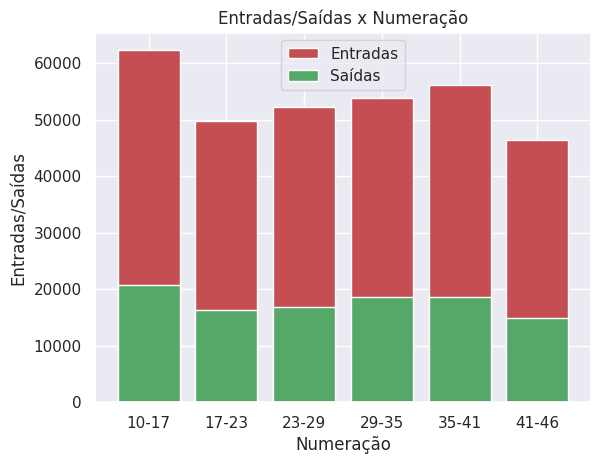

In [90]:
plt.bar(numeracao, num_entradas, label='Entradas', color='r')
plt.bar(numeracao, num_saidas, label='Saídas', color='g')

plt.ylabel('Entradas/Saídas')
plt.xlabel('Numeração')
plt.title('Entradas/Saídas x Numeração')
plt.legend()

plt.show()

##### Produtos com numeração 10-17 possuem mais entradas e saídas, mas a proporção de saídas comparados as outras numerações é menor que entradas.

In [91]:
fat_numeracao = data_copia.groupby(by='AGRUPAMENTO_NUM').agg(faturamento=('FAT. LIQUI', np.sum)).reset_index()
fat_numeracao

,AGRUPAMENTO_NUM,faturamento
0,10-17,436820.6
1,17-23,351131.2
2,23-29,351183.4
3,29-35,395428.3
4,35-41,389054.8
5,41-46,312667.5


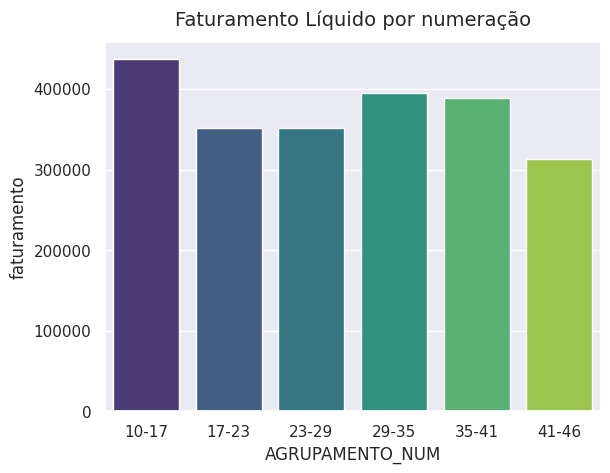

In [92]:
sns.barplot(data=fat_numeracao, x='AGRUPAMENTO_NUM', y='faturamento', palette='viridis');
plt.title('Faturamento Líquido por numeração', pad=12, fontdict={'fontsize':14})
plt.show()

##### Com um número maior de saídas, o grupo 10-17 possui maior participação no faturamento líquido

# - Conclusão

##### -> Algumas Técnicas e bibliotecas Utilizadas:

- Pandas, Numpy, Matplotlib, Seaborn, Plotly
- Funções de tratamento, limpeza e análise de dados com Pandas
- Funções Matemáticas com Numpy
- Agrupando métricas (GroupBy)
- Criação de Gráficos visuais
- Agrupamento de valores (Binning)
- Substituição de Valores
- Colunas condicionais

#### Através das análises exploratórias realizadas, foram abordadas métricas solicitadas pelo cliente, fornecendo dados para insights de negócio.

##### -> Métricas exploradas:

- Entradas e saídas por Gênero
- Saídas por Coleção
- Valor Unitário por Coleção
- Prazo Médio de Entregas e por Produto
- Faturamento por Loja/Filial
- Entradas e Saídas por categoria Adulto/Infantil
- Entradas e Saídas por Número/Calçado (Top 30)
- Participações por Número/Calçado
- Faturamento Acumulado e Classificação ABC
- Saídas e Faturamento por Período

##### -> Alguns Insights Gerados:

- Claramente há poucas saídas de produtos comparados a quantidade de entradas
- O Faturamento do ano de 2017 é maior que 2020, mas como foi abordado anteriormente, a pandemia do Corona vírus pode ter afetado negativamente o desempenho
- Números de Saídas bem maiores nos meses de Janeiro e Fevereiro, com queda acentuada do mês de Março em diante
- Aguns produtos com uma média de dias em Estoque muito altas

##### -> Possíveis causas:

- Falta de ações de marketing e divulgação
- Falta de análise de demanda para reposição de estoque
- Público-alvo mal definido
- 2020 em meio a pandemia, o cenário exigiu adaptação rápida

#####  -> Algumas Recomendações de ações:

- Criação de estratégias promocionais para girar o estoque parado
- Monitoramento mensal do estoque e das vendas com dashboards no PowerBI
- Implantação de um sistema de gestão de estoque para registrar todas as entradas e saídas
- Criar metas trimestrais

## ----------------------------------------------------------------------------------------------------------

# EPBP ANALYTICS -> Transformando dados complexos em insights claros para impulsionar o seu negócio.

### website: https://epbp-analytic.webnode.page/